# Polynomial regression
En muchas ocasiones la relación entre los datos no va a ser lineal, por lo que una simple regresión lineal no se va a ajustar bien a nuestra problemática.

Por ejemplo, en el siguiente ejemplo encajaria muy bien una regresión lineal.

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [36]:
X = df[['YearsExperience']]
y = df['Salary']

In [37]:
lin_reg = LinearRegression()

In [38]:
lin_reg.fit(X, y)

LinearRegression()

In [39]:
lin_reg.score(X,y)

0.9569566641435086

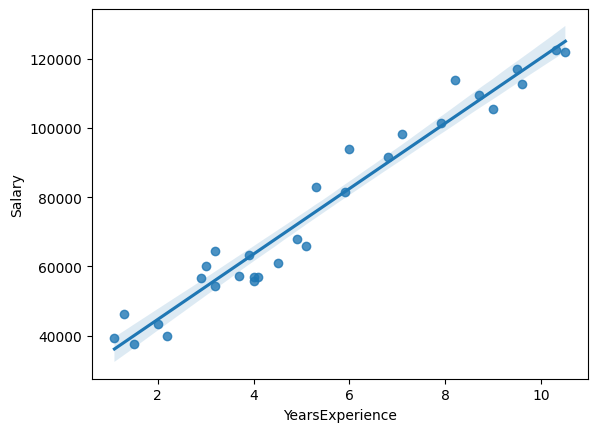

In [35]:
sns.regplot(data = df,
           x = 'YearsExperience',
           y = 'Salary');

En la vida real los problemas son más complejos, ya que los salarios no llevan una subida lineal vs años de experiencia, dependerá también de la carrera profesional: profesor, ingeniero, doctor...

Otra posible representación del salario podría ser en función del puesto de trabajo.

In [40]:
df = pd.read_csv('data/position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [43]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [44]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [45]:
lin_reg.score(X,y)

0.6690412331929895

/home/carlos/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


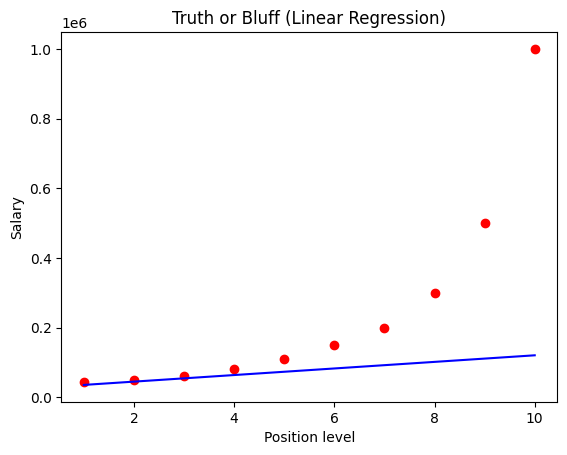

In [42]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

Vemos que en este caso, la regresión lineal no se ajusta nada bien a los datos, por lo que habrá que probar otras alternativas.

/tmp/ipykernel_2444/4008593066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y - lin_reg.predict(X));


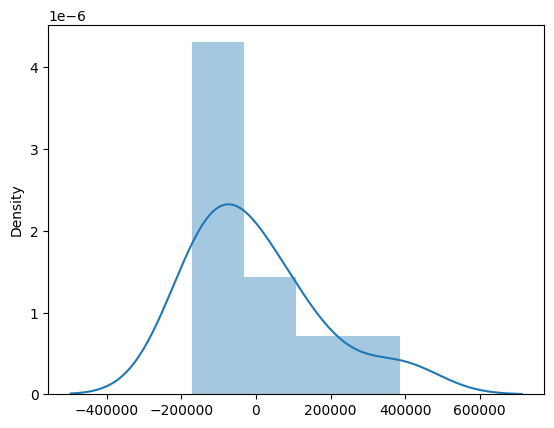

In [46]:
sns.distplot(y - lin_reg.predict(X));

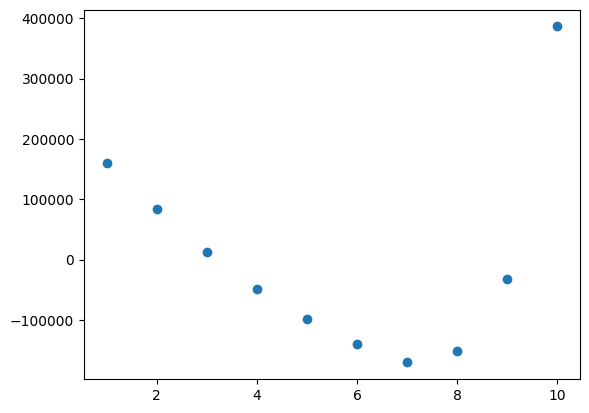

In [47]:
plt.scatter(X, y - lin_reg.predict(X));

`PolynomialFeatures` de sklearn genera nuevas features sintéticas, realizando todas las combinaciones posibles entre las potencias.

Si degree = 2 y tenemos dos features, devolverá: a^0, a^1, b^1, a^2, a\*b, b^2

En nuestro caso tenemos una única variable con degree = 3: a^0, a^1, a^2, a^3

In [48]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [87]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 3)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [88]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [89]:
pol_reg.coef_

array([     0.        , 180664.33566432, -48548.95104895,   4120.04662005])

In [90]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

`x^0 + x^1 + x^2 + x^3 + x^4 `

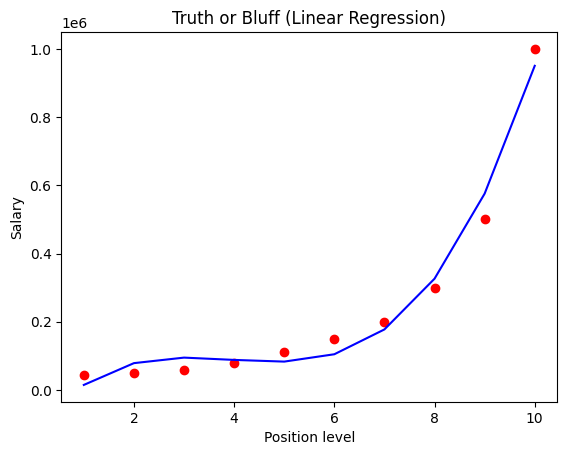

In [91]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(X_poly), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [92]:
pol_reg.score(X_poly,y)

0.9812097727913366

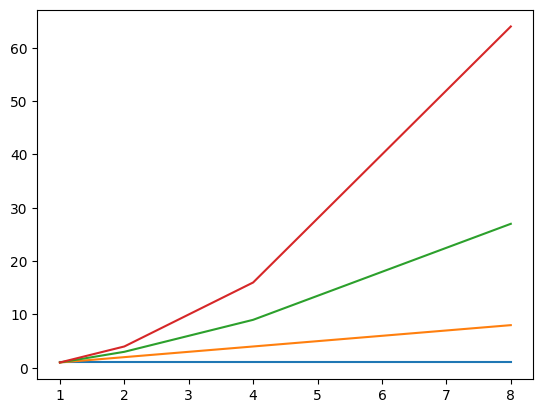

In [93]:
X_poly.T

plt.plot(X_poly[1],X_poly[0])
plt.plot(X_poly[1],X_poly[1])
plt.plot(X_poly[1],X_poly[2])
plt.plot(X_poly[1],X_poly[3])


Al añadir mucha complejidad podemos sobreajustar el modelo fácilmente

In [94]:
print(lin_reg.predict([[7.3]]))

[395081.81818182]


In [95]:
print(pol_reg.predict(poly_feats.transform([[7.3]])))

[213110.89160839]


In [96]:
df = pd.read_csv('data/position_salaries.csv')
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [100]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 8)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)
X_poly

array([[1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00],
       [1.0000000e+00, 2.0000000e+00, 4.0000000e+00, 8.0000000e+00,
        1.6000000e+01, 3.2000000e+01, 6.4000000e+01, 1.2800000e+02,
        2.5600000e+02],
       [1.0000000e+00, 3.0000000e+00, 9.0000000e+00, 2.7000000e+01,
        8.1000000e+01, 2.4300000e+02, 7.2900000e+02, 2.1870000e+03,
        6.5610000e+03],
       [1.0000000e+00, 4.0000000e+00, 1.6000000e+01, 6.4000000e+01,
        2.5600000e+02, 1.0240000e+03, 4.0960000e+03, 1.6384000e+04,
        6.5536000e+04],
       [1.0000000e+00, 5.0000000e+00, 2.5000000e+01, 1.2500000e+02,
        6.2500000e+02, 3.1250000e+03, 1.5625000e+04, 7.8125000e+04,
        3.9062500e+05],
       [1.0000000e+00, 6.0000000e+00, 3.6000000e+01, 2.1600000e+02,
        1.2960000e+03, 7.7760000e+03, 4.6656000e+04, 2.7993600e+05,
        1.6796160e+06],
       [1.0000000e+00, 7.0000000e+00, 4.

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2,random_state=2023)

In [102]:
X_test

array([[1.0000000e+00, 9.0000000e+00, 8.1000000e+01, 7.2900000e+02,
        6.5610000e+03, 5.9049000e+04, 5.3144100e+05, 4.7829690e+06,
        4.3046721e+07],
       [1.0000000e+00, 3.0000000e+00, 9.0000000e+00, 2.7000000e+01,
        8.1000000e+01, 2.4300000e+02, 7.2900000e+02, 2.1870000e+03,
        6.5610000e+03]])

In [103]:
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

LinearRegression()

In [104]:
predictions = pol_reg.predict(X_test)

In [105]:
df_preds = pd.DataFrame(predictions, columns = ['predictions'])
df_preds['real_value'] = pd.Series(y_test)

df_preds

,predictions,real_value
0,547081.352031,500000
1,62257.439769,60000


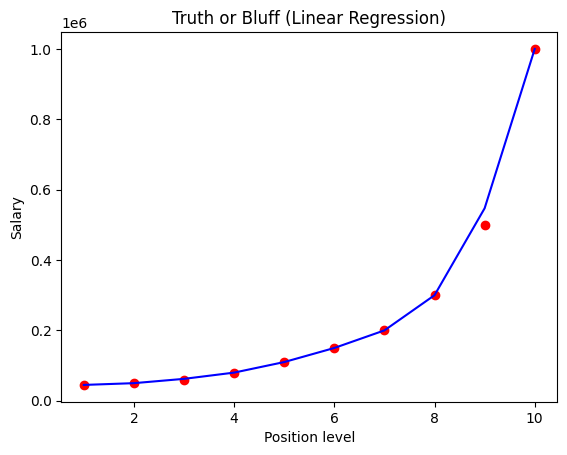

In [106]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(X_poly), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [107]:
from sklearn.metrics import r2_score
r2_score(pol_reg.predict(X_test), y_test)

0.9810958536494659